In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import copy
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

# 유틸 함수 import
from util import pre_time

# 데이터 로드
data = pd.read_csv('./data/직항_머신러닝.csv')
# 일본 데이터 추출
df = data.loc[data['partition_0']=='Japan']
# 시간 전처리
df = pre_time(df)

In [2]:
df

,nights,dep_week,dep_time,dep_jt,arr_week,arr_time,arr_jt,partition_0,partition_1,time_zone,agentcode,baggagetype,total_fare
1459,4,3,480,85,7,635,85,Japan,FUK,Asia/Tokyo,INT005,F,309300
1460,4,3,480,85,7,985,90,Japan,FUK,Asia/Tokyo,INT005,F,375600
1461,4,3,480,85,7,1265,90,Japan,FUK,Asia/Tokyo,INT005,F,406600
1462,4,3,1115,85,7,635,85,Japan,FUK,Asia/Tokyo,INT005,F,269400
1463,4,3,1115,85,7,985,90,Japan,FUK,Asia/Tokyo,INT005,F,335800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
714787,4,2,445,155,6,805,140,Japan,TYO,Asia/Tokyo,VGT027,F,373100
714788,4,2,445,155,6,1030,150,Japan,TYO,Asia/Tokyo,VGT027,F,373100
714789,4,2,445,155,6,620,160,Japan,TYO,Asia/Tokyo,VGT027,F,404200
714790,4,2,445,155,6,670,150,Japan,TYO,Asia/Tokyo,VGT027,F,382000


In [3]:
## agent 별 공항 분포

# print(df['partition_1'].value_counts())
# airport_list = df['partition_1'].unique().tolist()
# agent_partition_data = df[['agentcode','partition_1','partition_0']].groupby('agentcode').value_counts().reset_index()

# unique_partitions = df['partition_1'].unique()
# palette = sns.color_palette(palette='bright',n_colors= len(unique_partitions))
# color_mapping = dict(zip(unique_partitions, palette))


# for agent in df['agentcode'].unique():

#     plt.figure(figsize=(12, 6))
#     sns.barplot(x='partition_1', y='count',
#                 data=agent_partition_data.loc[agent_partition_data['agentcode']==agent],
#                 palette=color_mapping)
    
#     plt.xlabel('출발 시간 (분 단위)')
#     plt.ylabel('항공편 수')
#     plt.title(f'{agent} \n agent 별 공항 분포')
#     plt.xticks(rotation=90, size=8)
#     plt.tight_layout()

#     # 그래프 보여주기
#     plt.show()

In [4]:
# for partition in df['partition_1'].unique():
#     subset = df[df['partition_1'] == partition]
#     plt.figure(figsize=(14, 7))
#     sns.boxplot(x='dep_time', y='total_fare', hue='dep_week', data=subset)
#     plt.title(f'Total Fare Distribution for Partition {partition}')
#     plt.xlabel('Departure Time')
#     plt.ylabel('Total Fare')
#     plt.xticks(rotation=45)
#     plt.show()


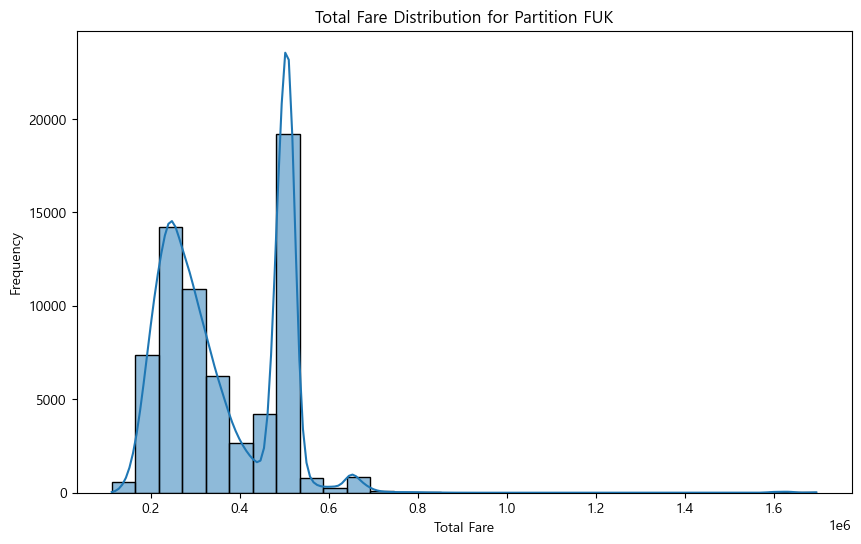

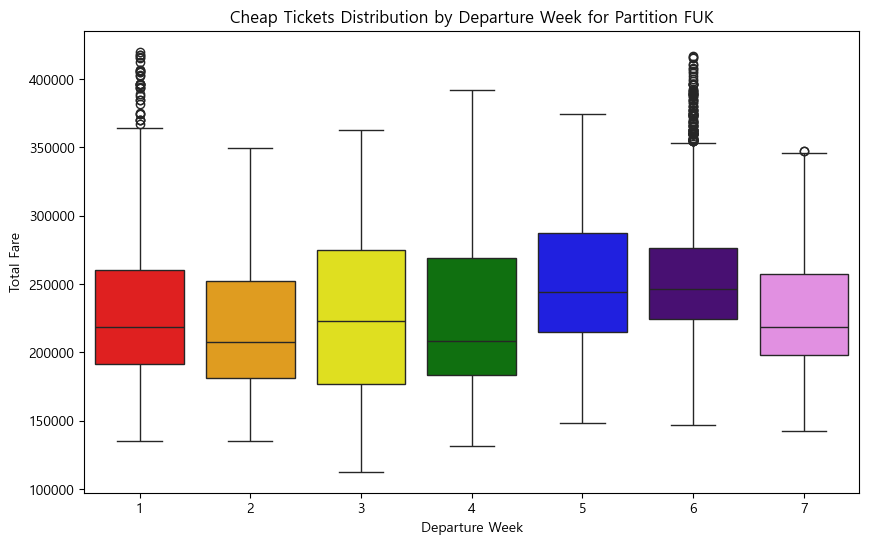

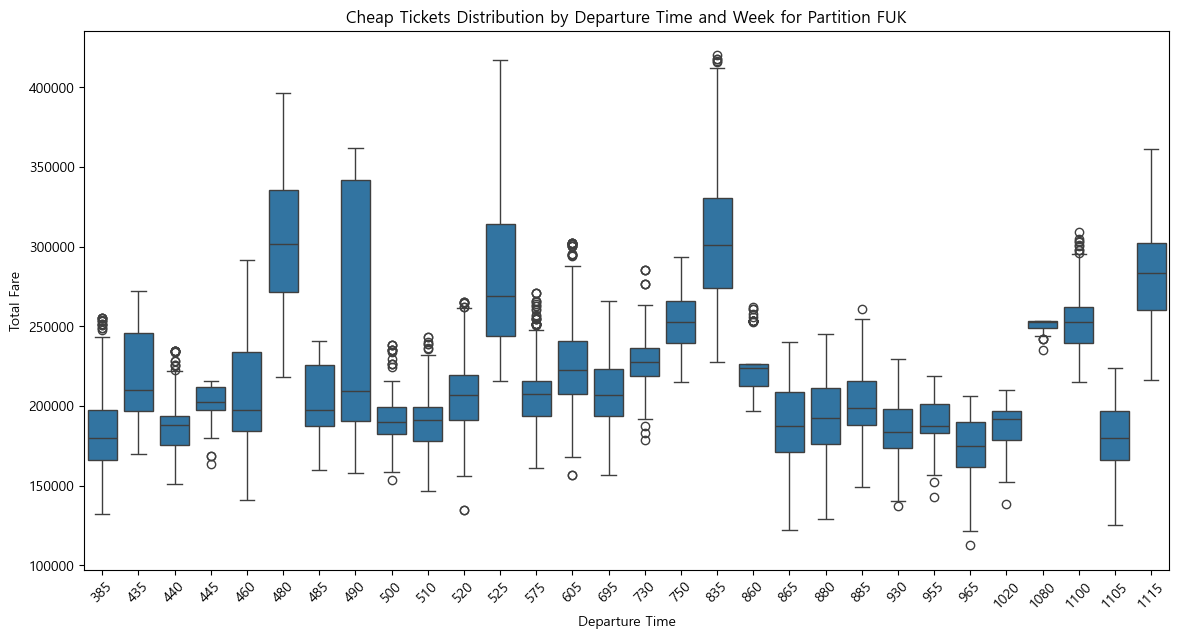

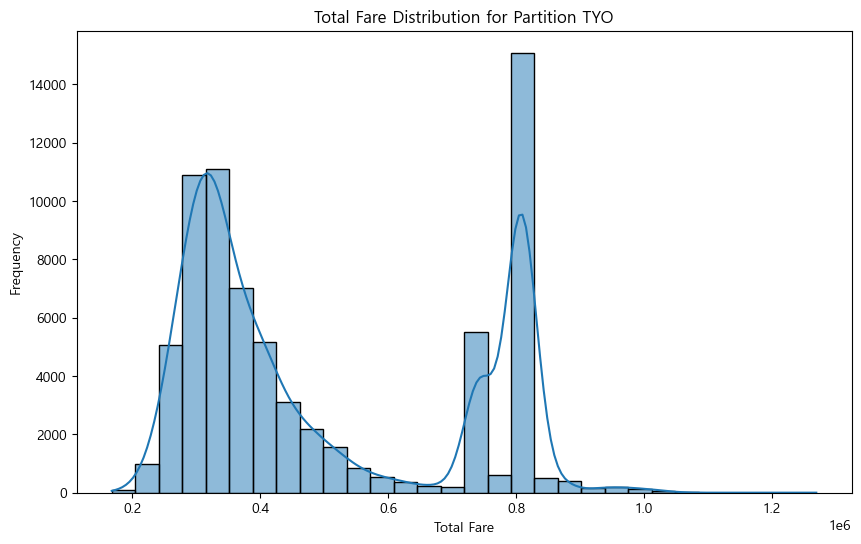

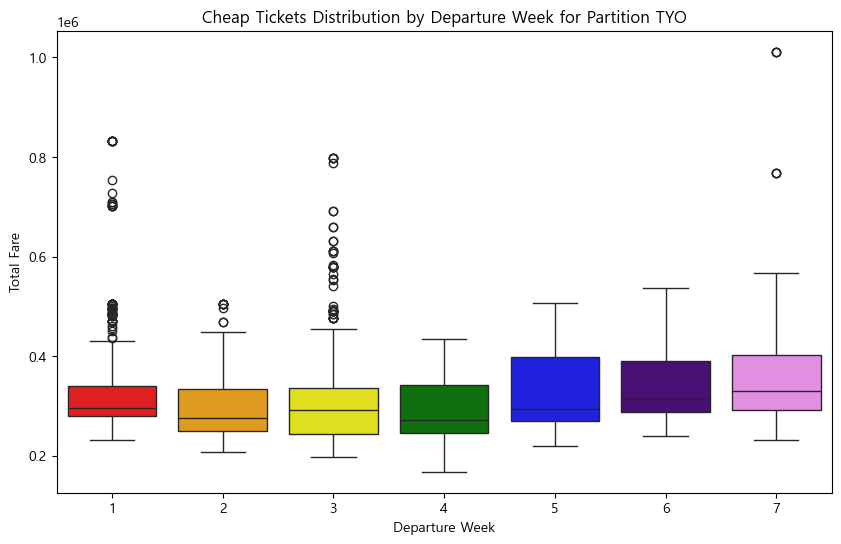

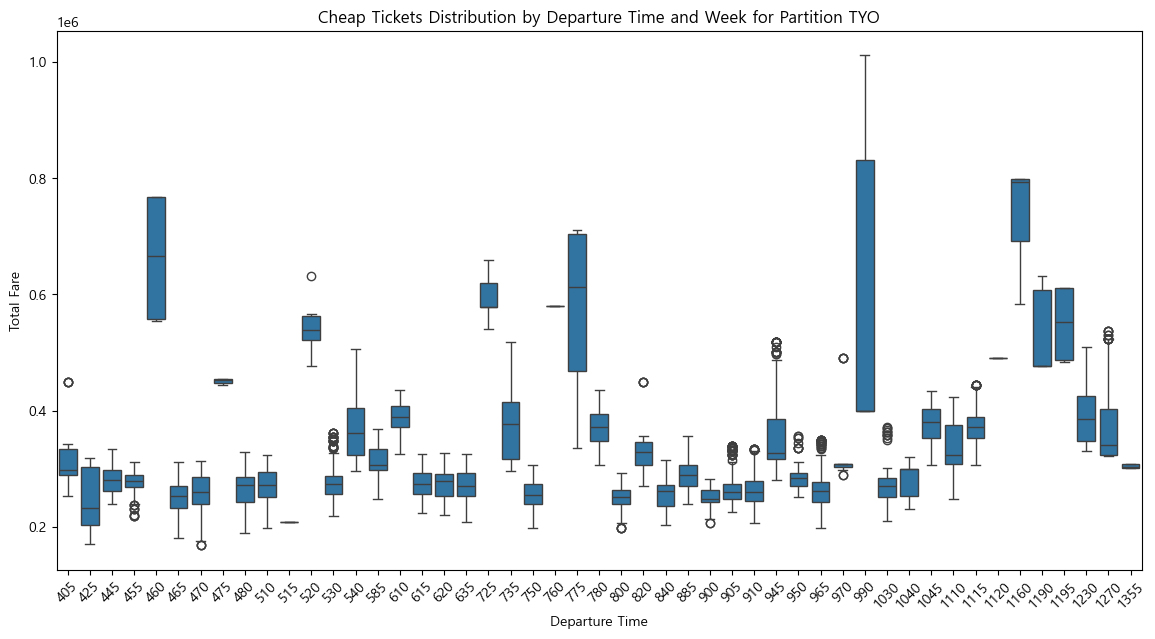

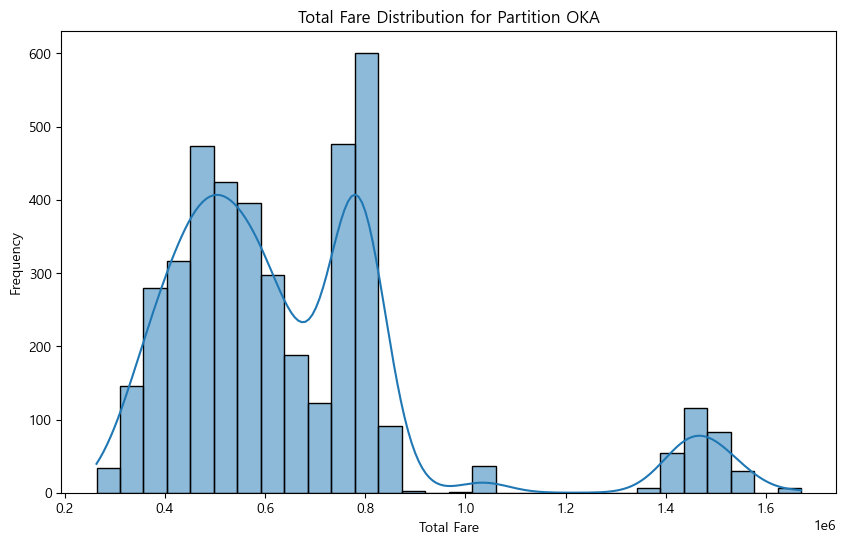

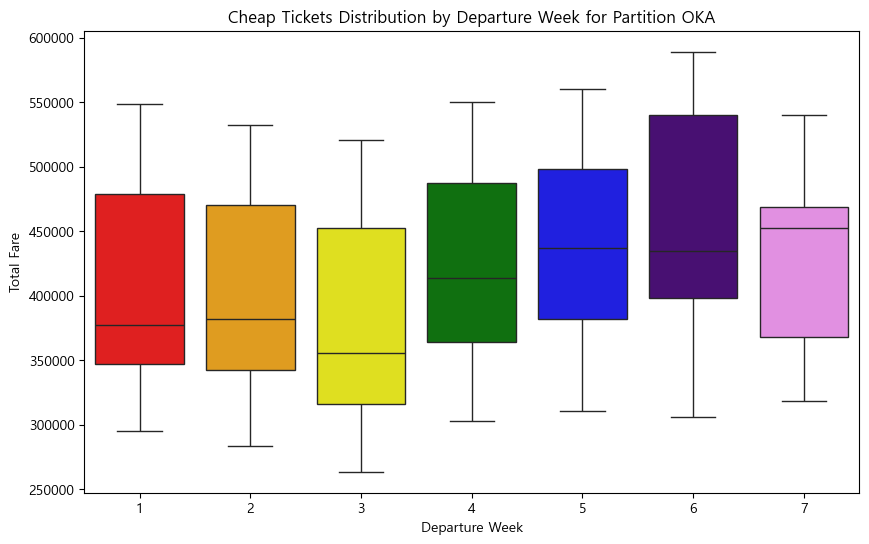

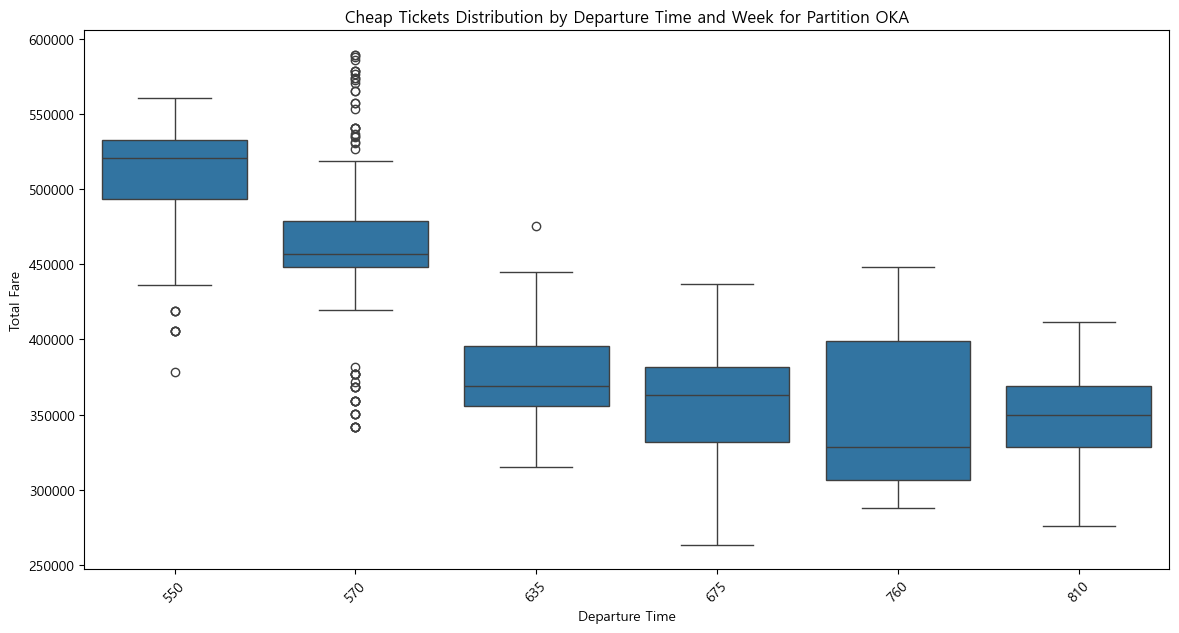

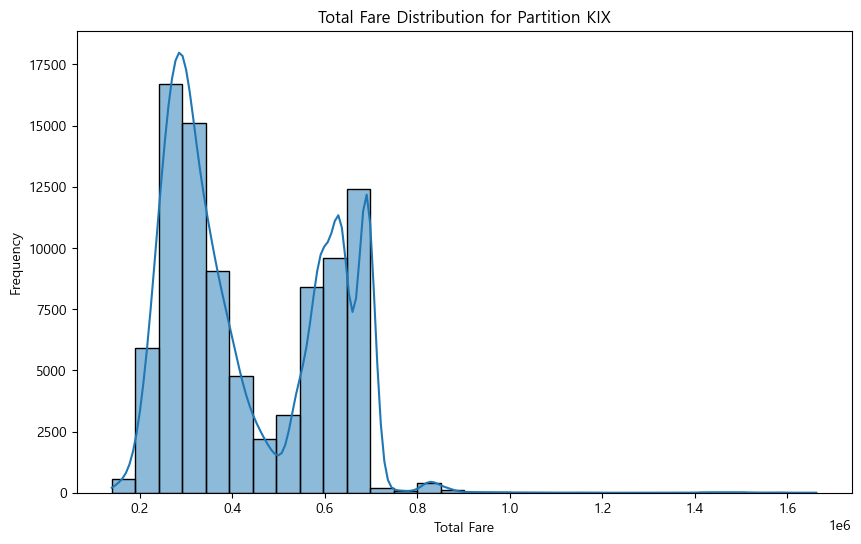

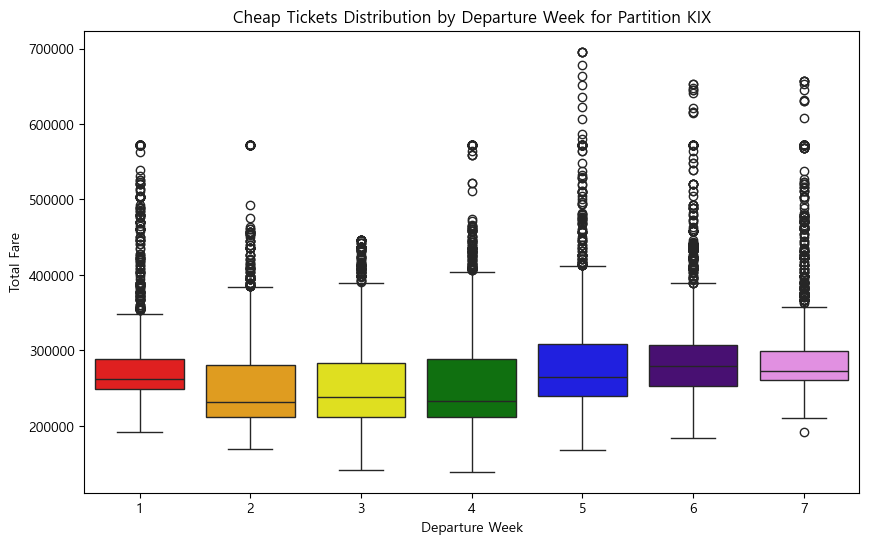

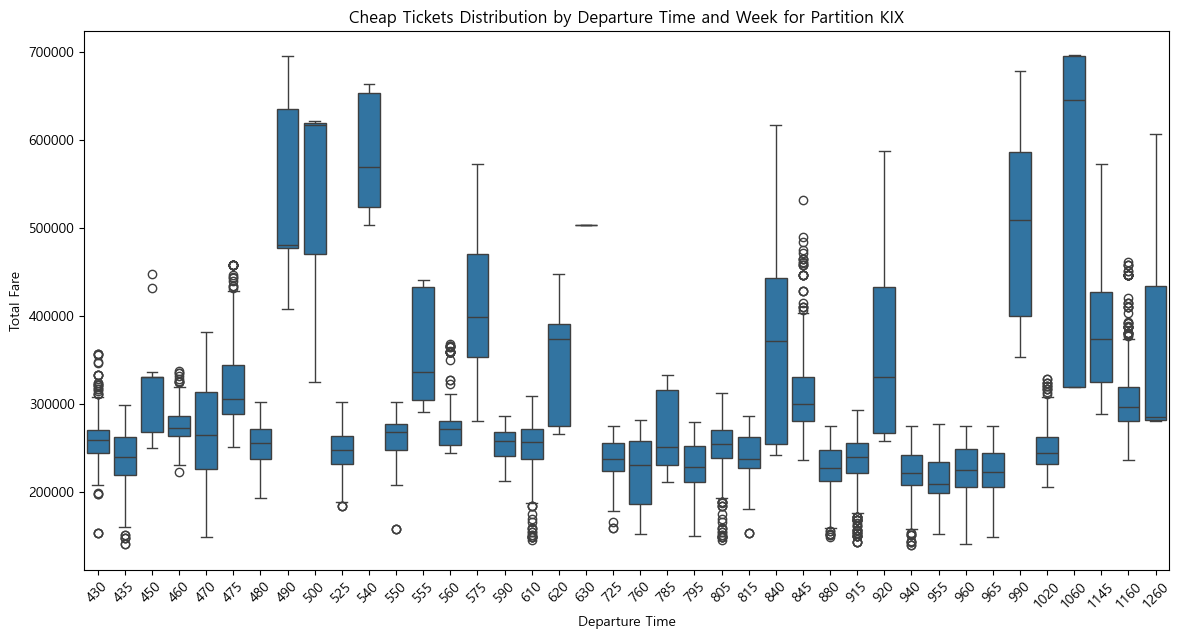

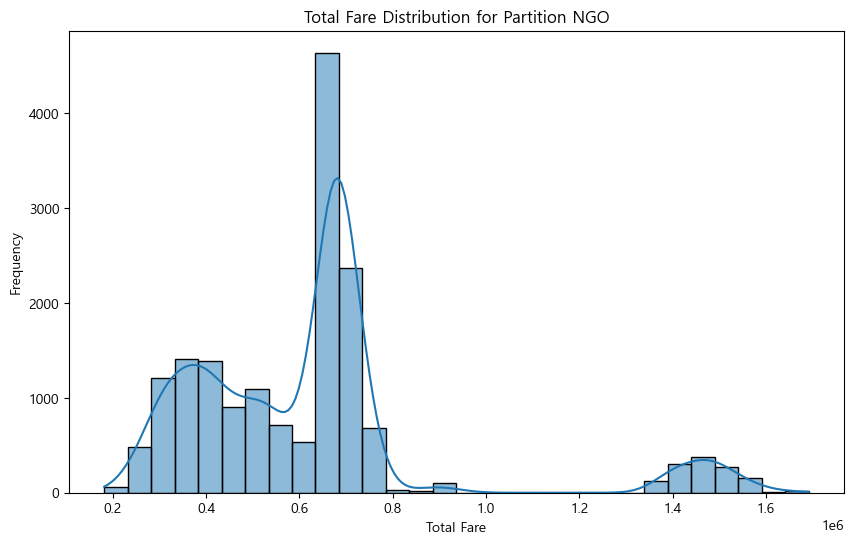

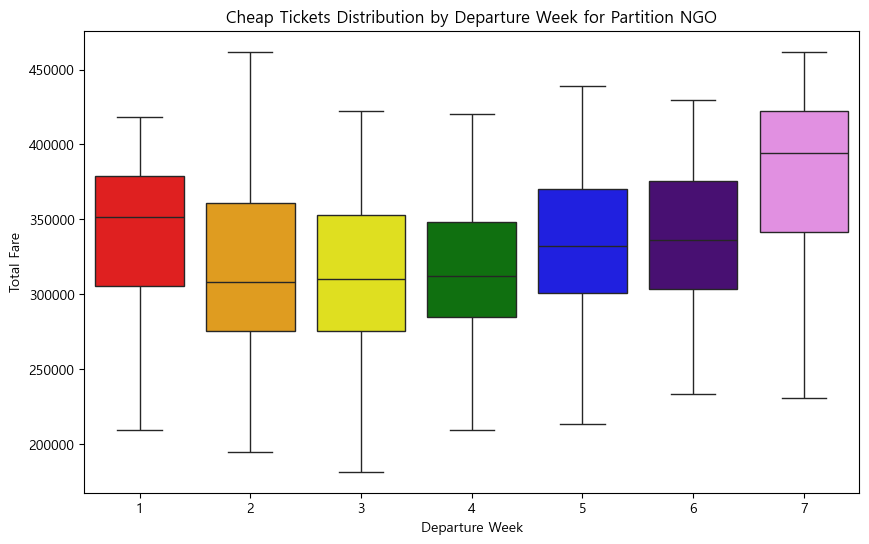

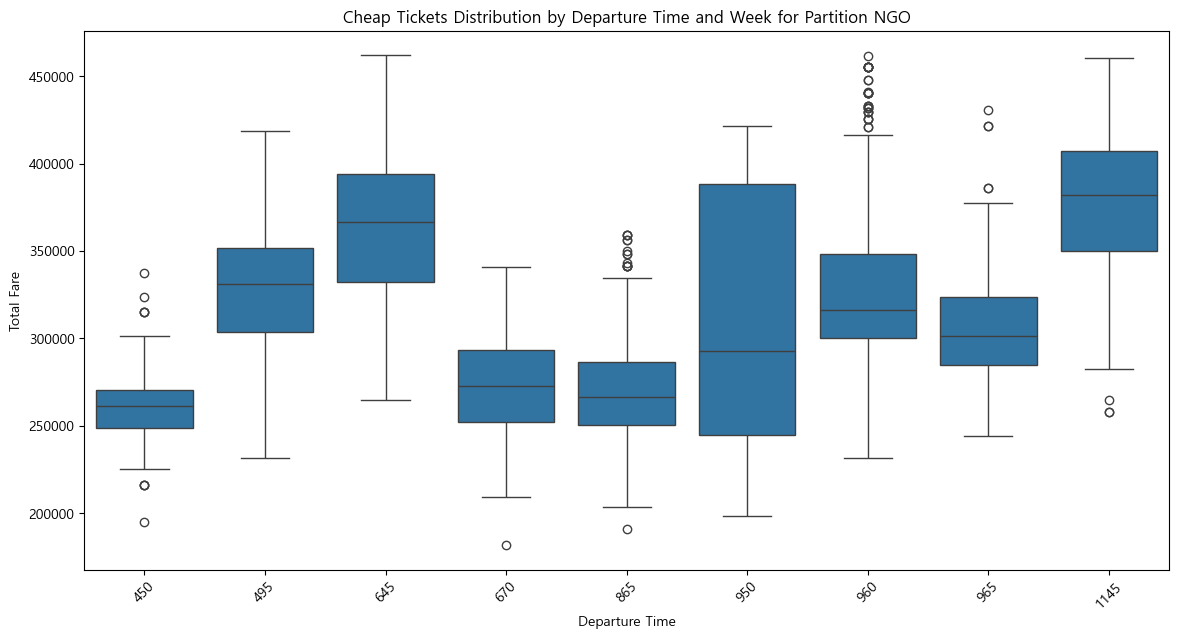

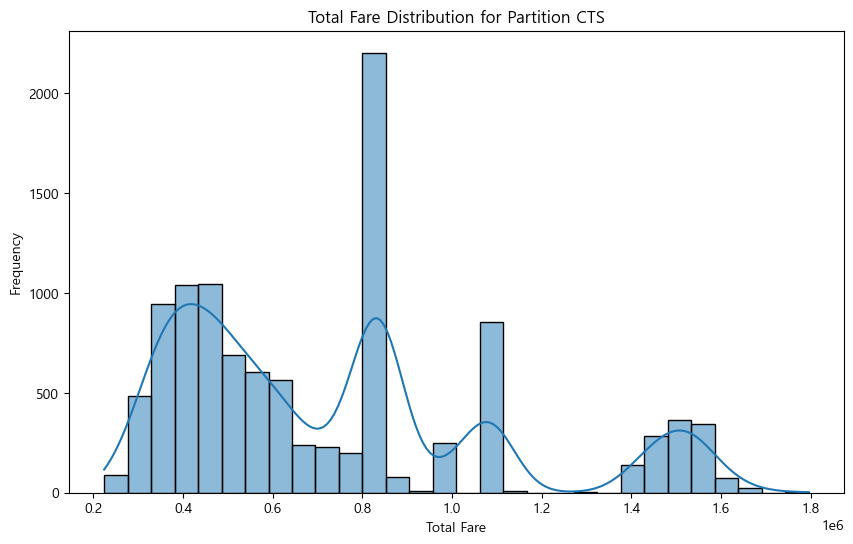

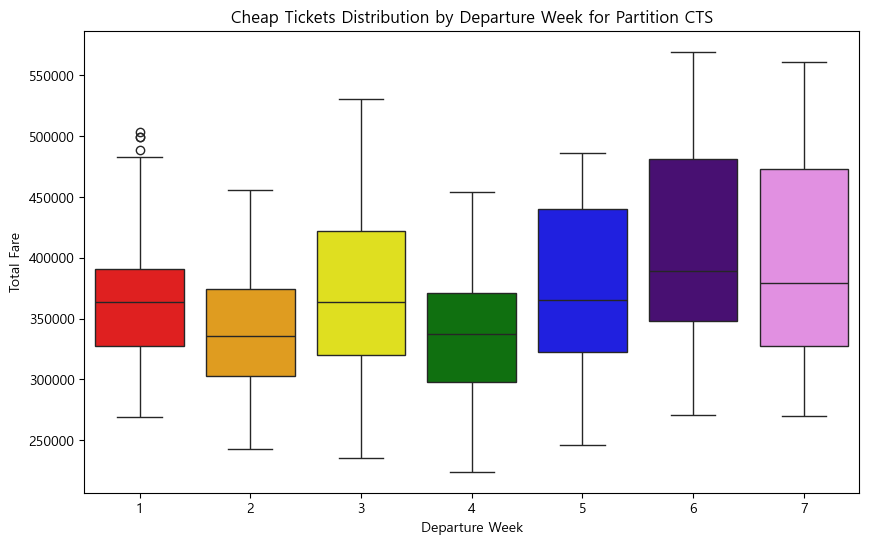

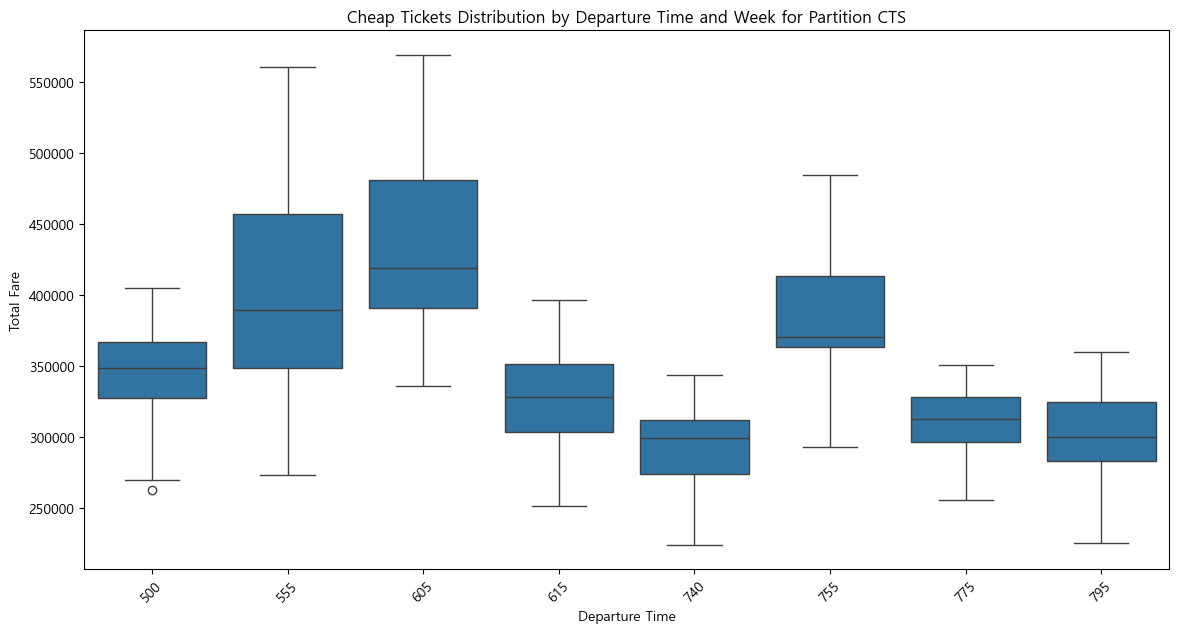

In [5]:
# 'partition_1', 'dep_week', 'dep_time'별로 그룹화하고 하위 25%의 값만 필터링하는 함수
def filter_cheap_tickets(group):
    threshold = group['total_fare'].quantile(0.15)
    return group[group['total_fare'] <= threshold]

# 그룹별로 하위 25%의 항공권을 필터링
cheap_tickets_df = df.groupby(['partition_1', 'dep_week', 'dep_time']).apply(filter_cheap_tickets).reset_index(drop=True)

# 색상 팔레트 정의 (빨주노초파남보)
palette = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

for partition in df['partition_1'].unique():
    subset = df[df['partition_1'] == partition]

    # 전체 요금 분포를 히스토그램으로 시각화
    plt.figure(figsize=(10, 6))
    sns.histplot(subset['total_fare'], bins=30, kde=True)
    plt.title(f'Total Fare Distribution for Partition {partition}')
    plt.xlabel('Total Fare')
    plt.ylabel('Frequency')
    plt.show()

    # 저렴한 항공권 데이터 필터링
    cheap_tickets = cheap_tickets_df[cheap_tickets_df['partition_1'] == partition]

    # 저렴한 항공권의 출발 요일 분포
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='dep_week', y='total_fare', data=cheap_tickets, palette=palette)
    plt.title(f'Cheap Tickets Distribution by Departure Week for Partition {partition}')
    plt.xlabel('Departure Week')
    plt.ylabel('Total Fare')
    plt.show()
    
    # 저렴한 항공권의 출발 시간 분포
    plt.figure(figsize=(14, 7))
    # sns.boxplot(x='dep_time', y='total_fare', hue='dep_week', data=cheap_tickets, palette=palette)
    sns.boxplot(x='dep_time', y='total_fare', data=cheap_tickets)
    plt.title(f'Cheap Tickets Distribution by Departure Time and Week for Partition {partition}')
    plt.xlabel('Departure Time')
    plt.ylabel('Total Fare')
    plt.xticks(rotation=45)
    plt.show()
    

    
    # # 피벗 테이블로 요일별 평균 요금 계산 및 히트맵 시각화
    # pivot_table = subset.pivot_table(values='total_fare', index='dep_week', columns='dep_time', aggfunc='mean')
    # plt.figure(figsize=(14, 7))
    # sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='Reds', cbar_kws={'label': 'Total Fare'})
    # plt.title(f'Pivot Table Heatmap for Partition {partition}')
    # plt.xlabel('Departure Time')
    # plt.ylabel('Departure Week')
    
    # # 히트맵의 value 값을 90도 회전
    # for text in plt.gca().texts:
    #     text.set_rotation(90)
        
    plt.show()